In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

In [ ]:
'''
輸入資料
'''
import os
import pandas as pd
from scipy.io import arff

data = '/content/german.data'
print(data)

columns_name = ['ExistingCheckingAccount', 'Duration_month', 'CreditHistory', 'Purpose', 'CreditAmount',
         'SavingsAccount', 'EmploymentSince', 'InstallmentRate_DisposableIncome', 'StatusAndSex', 'OtherDebtors',
         'ResidenceSince', 'Property', 'Age_year', 'OtherInstallmentPlans', 'Housing',
         'ExistingCredits', 'Job', 'PeopleLiable', 'Telephone', 'ForeignWorker', 'Classification']

dataset = pd.read_csv(data, names=columns_name, delimiter=' ')
print(dataset)

'''
分類欄位名稱
'''
numAttribute = ['ExistingCheckingAccount', 'CreditHistory', 'Purpose', 'SavingsAccount', 'EmploymentSince',
           'StatusAndSex', 'OtherDebtors', 'Property', 'OtherInstallmentPlans', 'Housing', 'Job',
           'Telephone', 'ForeignWorker']
qualiAttribute = ['CreditAmount', 'Duration_month', 'InstallmentRate_DisposableIncome', 'ResidenceSince', 'Age_year',
           'ExistingCredits', 'PeopleLiable', 'Classification']

'''
欄位前處理
'''

for j in range(len(qualiAttribute)):
    dataset[qualiAttribute[j]] = pd.to_numeric(dataset[qualiAttribute[j]])
print(dataset.head())

'''
Label encoding編碼
'''
from sklearn.preprocessing import LabelEncoder

dataset_origin = dataset
print(dataset_origin.head())

labelencoder = LabelEncoder()
for i in range(len(numAttribute)):
    print('before: ', numAttribute[i],": ", dataset_origin[numAttribute[i]].unique())
    dataset[numAttribute[i]] = labelencoder.fit_transform(dataset[numAttribute[i]])
    print('afer: ', numAttribute[i],": ", dataset[numAttribute[i]].unique())
print(dataset.head())

dataset.Classification.replace([1,2], [1,0], inplace=True)
print(dataset.info())

/content/german.data
    ExistingCheckingAccount  Duration_month CreditHistory Purpose  \
0                       A11               6           A34     A43   
1                       A12              48           A32     A43   
2                       A14              12           A34     A46   
3                       A11              42           A32     A42   
4                       A11              24           A33     A40   
..                      ...             ...           ...     ...   
995                     A14              12           A32     A42   
996                     A11              30           A32     A41   
997                     A14              12           A32     A43   
998                     A11              45           A32     A43   
999                     A12              45           A34     A41   

     CreditAmount SavingsAccount EmploymentSince  \
0            1169            A65             A75   
1            5951            A61             A

In [ ]:
interval = (18, 40, 60, 120)

cats = [0, 1, 2]
dataset["Age Category"] = pd.cut(dataset.Age_year, interval, labels=cats)

dataset["Age Category"] = pd.to_numeric(dataset["Age Category"])

print(dataset["Age Category"])

0      2
1      0
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Age Category, Length: 1000, dtype: int64


In [ ]:
interval = (1,24,100)

cats = [0, 1]
dataset["Duration_month"] = pd.cut(dataset.Duration_month, interval, labels=cats)
dataset["Duration_month"] = pd.to_numeric(dataset["Duration_month"])
print(dataset["Duration_month"])

0      0
1      1
2      0
3      1
4      0
      ..
995    0
996    1
997    0
998    1
999    1
Name: Duration_month, Length: 1000, dtype: int64


In [ ]:
dataset_train = dataset[:900]
dataset_test= dataset[900:]
print(dataset_train)

     ExistingCheckingAccount  Duration_month  CreditHistory  Purpose  \
0                          0               0              4        4   
1                          1               1              2        4   
2                          3               0              4        7   
3                          0               1              2        3   
4                          0               0              3        0   
..                       ...             ...            ...      ...   
895                        3               1              3        1   
896                        0               0              2        4   
897                        3               0              4        3   
898                        3               0              2        3   
899                        0               0              2        3   

     CreditAmount  SavingsAccount  EmploymentSince  \
0            1169               4                4   
1            5951          

In [ ]:
dataset_train.isnull().sum()

ExistingCheckingAccount             0
Duration_month                      0
CreditHistory                       0
Purpose                             0
CreditAmount                        0
SavingsAccount                      0
EmploymentSince                     0
InstallmentRate_DisposableIncome    0
StatusAndSex                        0
OtherDebtors                        0
ResidenceSince                      0
Property                            0
Age_year                            0
OtherInstallmentPlans               0
Housing                             0
ExistingCredits                     0
Job                                 0
PeopleLiable                        0
Telephone                           0
ForeignWorker                       0
Classification                      0
Age Category                        0
dtype: int64

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN

X = dataset_train.drop('Classification', axis=1)
y = dataset_train['Classification']

X_test = dataset_test.drop('Classification', axis=1)
y_test = dataset_test['Classification']
print(pd.isna(X))
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# Apply SMOTE

#sm = BorderlineSMOTE(sampling_strategy='minority')
sm = SMOTE(sampling_strategy='minority')
X_train_s, y_train_s = sm.fit_resample(X, y)

print("Before/After clean")
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_s, return_counts=True)
print(dict(zip(unique, counts)))

     ExistingCheckingAccount  Duration_month  CreditHistory  Purpose  \
0                      False           False          False    False   
1                      False           False          False    False   
2                      False           False          False    False   
3                      False           False          False    False   
4                      False           False          False    False   
..                       ...             ...            ...      ...   
895                    False           False          False    False   
896                    False           False          False    False   
897                    False           False          False    False   
898                    False           False          False    False   
899                    False           False          False    False   

     CreditAmount  SavingsAccount  EmploymentSince  \
0           False           False            False   
1           False          

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold

print(' with grid search')
# play with these params
params={
    'max_depth': [3, 5, 7, 9],
    'min_child_weight':range(1,6,2),
    'eta':[0.05,0.1,0.15,0.2],
    'gamma':[i/10.0 for i in range(0,5)]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

xgb_clf = xgb.XGBClassifier()

rs = GridSearchCV(xgb_clf,
                  params,
                  cv=kfold,
                  scoring="roc_auc",
                  verbose=False)

rs.fit(X_train_s, y_train_s)


print("最佳参数组合：", rs.best_params_)
print("最佳模型得分：", -rs.best_score_)

best_model =  rs.best_estimator_

# 測試
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1] #model.best_iteration

print ('\n')
print ("Model Final Generalization roc_auc_score: %.6f" %roc_auc_score(y_test,y_pred_proba))
print ("Model Final Generalization ACC: %.6f" %accuracy_score(y_test,y_pred))
print ("Model Final Generalization F1: %.6f" %f1_score(y_test,y_pred))
print ("Model Final Generalization precision: %.6f" %precision_score(y_test,y_pred))
print ("Model Final Generalization recall: %.6f" %recall_score(y_test,y_pred))

np.save('/content/y_test_f.npy', y_test)
np.save('/content/y_pred_proba_f.npy', y_pred_proba)

 with grid search
最佳参数组合： {'eta': 0.1, 'gamma': 0.0, 'max_depth': 7, 'min_child_weight': 1}
最佳模型得分： -0.9015758049611751


Model Final Generalization roc_auc_score: 0.816636
Model Final Generalization ACC: 0.800000
Model Final Generalization F1: 0.852941
Model Final Generalization precision: 0.852941
Model Final Generalization recall: 0.852941


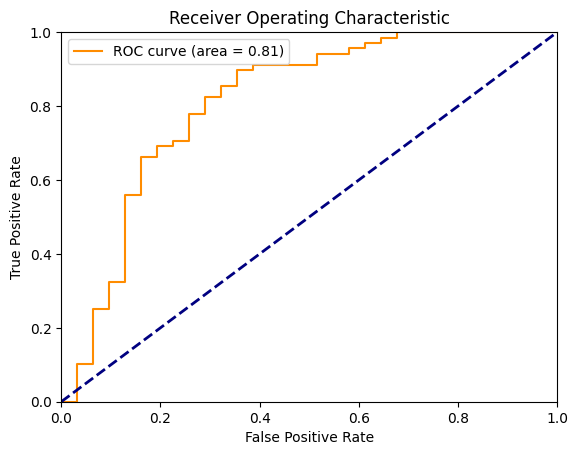



Accuracy score of the model 0.8181818181818182
Classification report 

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        31
           1       0.85      0.90      0.87        68

    accuracy                           0.82        99
   macro avg       0.79      0.77      0.78        99
weighted avg       0.81      0.82      0.81        99



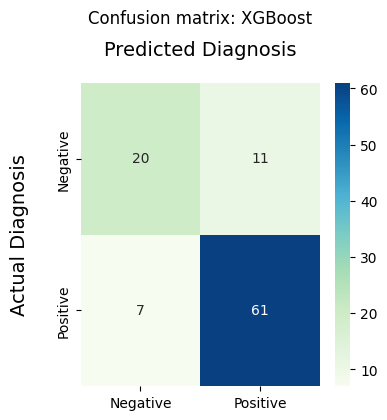

In [ ]:
import seaborn as sns

# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

def model_performance(y_test,y_pred, method):

    # calculate the accruacy of the model
    print("Accuracy score of the model", accuracy_score(y_test,y_pred))
    print("Classification report \n")

    #generate the classification report
    print(classification_report(y_test,y_pred))

    #generate the confusion matrix
    fig = plt.figure(figsize = (4,4))
    ax = fig.gca()
    cnf_matrix_log = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="GnBu" , fmt='g')
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
    ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
    plt.tight_layout()
    plt.title('Confusion matrix: '+  method + '\n', y=1.1)

get_roc (y_test,y_pred_proba)
print('\n')
model_performance(y_test,y_pred, 'XGBoost')

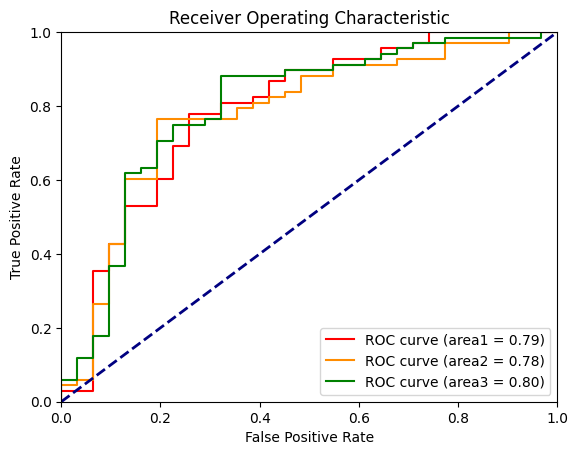

In [ ]:
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()

fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()

y_test1 = np.load('/content/y_test.npy')
y_pred1 = np.load('/content/y_pred_proba.npy')
y_test2 = np.load('/content/y_test_s.npy')
y_pred2 = np.load('/content/y_pred_proba_s.npy')
y_test3 = np.load('/content/y_test_f.npy')
y_pred3 = np.load('/content/y_pred_proba_f.npy')

fpr1, tpr1, _ = roc_curve(y_test1, y_pred1)
fpr2, tpr2, _ = roc_curve(y_test2, y_pred2)
fpr3, tpr3, _ = roc_curve(y_test3, y_pred3)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
#Plot of a ROC curve
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='red',
          label='ROC curve (area1 = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='darkorange',
          label='ROC curve (area2 = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green',
          label='ROC curve (area3 = %0.2f)' % roc_auc3)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()